In [320]:
import numpy as np
import pandas as pd
from sklearn.metrics.pairwise import euclidean_distances
import matplotlib.pyplot as plt

In [321]:
X = pd.read_csv('dbscan.csv')

In [322]:
points = X.iloc[0:X.shape[0],2:4]
points = points.values

In [323]:
neighbors_points = X.iloc[0:X.shape[0],5:7].values
neighbor_point_list = list()
for each_neighbor in range(0,neighbors_points.shape[0]):
    neighbor_point_list.append(list(map(int, neighbors_points[each_neighbor][0].split(","))))




In [324]:
ed_mat = euclidean_distances(points)

In [325]:
def rangeQuery(ed_mat,eps,point_id):
    n_points = ed_mat.shape[1]
    seeds = []
    for i in range(0, n_points):
        if ed_mat[point_id][i]<eps:
            seeds.append(i)
    return seeds


In [350]:
def expandCluster(ed_mat,point_id,eps,min_points,cluster_label,c_id,neighbors):
    cluster_label[point_id] = c_id
    neighbors_of_each_neighbor = []
    each_neighbor_id = 0
    while each_neighbor_id < len(neighbors):
        
        if(cluster_label[neighbors[each_neighbor_id]] == -1): #noise
            cluster_label[neighbors[each_neighbor_id]] = c_id
            
        elif cluster_label[neighbors[each_neighbor_id]] == 0: #if label not assigned
             cluster_label[neighbors[each_neighbor_id]] = c_id
        
        neighbors_of_each_neighbor = rangeQuery(ed_mat,eps,neighbors[each_neighbor_id])
            
        if len(neighbors_of_each_neighbor)>=min_points:
            for each_neighbor in neighbors_of_each_neighbor:
                if each_neighbor not in neighbors:
                    neighbors.append(each_neighbor)
        
        each_neighbor_id+=1
    return cluster_label
            
        

In [351]:
def DBScan(x,ed_mat,eps,min_points):
    cluster_label ={}
    c_id = 0
    #initialize each cluster id ed_mat
    for point_id in range(x.shape[0]):
        cluster_label[point_id] = 0
    for point_id in range(x.shape[0]):
        if not(cluster_label[point_id]==0):
            continue
        #neighbors = rangeQuery(ed_mat,eps,i)
        #print(len(neighbor_point_list[point_id]))
        if len(neighbor_point_list[point_id]) < min_points:    
            cluster_label[point_id] = -1 #considering it as noise
            
        else:  
            c_id+=1
            cluster_label = expandCluster(ed_mat,point_id,eps,min_points,cluster_label,c_id,neighbor_point_list[point_id])
    return list(cluster_label.values()) 
    
    
    

In [352]:
y_pred = DBScan(points,ed_mat,7.5,3)

In [353]:
print(len(set(y_pred)))
#print(neighbor_point_list) 


4


In [354]:
def visualize_clusters(points,y_pred):
    x_values = []
    y_values = []
    for x,y in points:
        #print(x)
        #print(y)
        x_values.append(x)
        y_values.append(y)
    plt.scatter(x_values,y_values,c=y_pred)

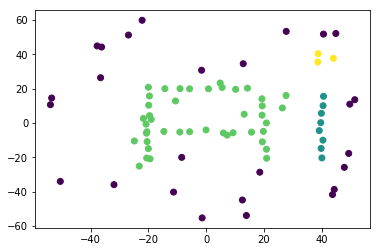

In [355]:
visualize_clusters(points,y_pred)